In [3]:
from statistics import median
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [11]:
import pandas as pd
import torch
import json
from collections import Counter, defaultdict
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('downloads/colbertv2.0')
inv_vocab = {v: k for k, v in tokenizer.vocab.items()}

chunk_idx = -1
codes = []

code2tok = defaultdict(Counter)
tok2code = defaultdict(Counter)

with open('ids.jsonl') as fin:
  id_it = iter(fin)
  next(id_it)
  for ids in id_it:
    ids = json.loads(ids)
    if len(codes) == 0:
      chunk_idx += 1
      print(f'chunk {chunk_idx}')
      codes = torch.load(f'experiments/notebook/indexes/2bits/{chunk_idx}.codes.pt').cpu().tolist()
    for idx, id in enumerate(ids):
        if inv_vocab[id].startswith('##') or inv_vocab[id].startswith('['):
            continue
        token = inv_vocab[id]
        these_codes = {codes[idx]}
        idx += 1
        while idx < len(ids) and inv_vocab[ids[idx]].startswith('##'):
            token += inv_vocab[ids[idx]][2:]
            these_codes.add(codes[idx])
            idx += 1
        token = ps.stem(token)
        for code in these_codes:
            code2tok[code][token] += 1
            tok2code[token][code] += 1
    codes = codes[len(ids):]
code2count = Counter({k: len(v) for k, v in code2tok.items()})
code2total = Counter({k: sum(v.values()) for k, v in code2tok.items()})
code2toppct = Counter({k: v.most_common(1)[0][1] / code2total[k] for k, v in code2tok.items()})
tok2count = Counter({k: len(v) for k, v in tok2code.items()})
tok2total = Counter({k: sum(v.values()) for k, v in tok2code.items()})
tok2toppct = Counter({k: v.most_common(1)[0][1] / tok2total[k] for k, v in tok2code.items()})

chunk 0
chunk 1
chunk 2
chunk 3
chunk 4
chunk 5
chunk 6
chunk 7
chunk 8
chunk 9
chunk 10
chunk 11
chunk 12
chunk 13
chunk 14
chunk 15
chunk 16
chunk 17
chunk 18
chunk 19
chunk 20
chunk 21
chunk 22
chunk 23
chunk 24
chunk 25
chunk 26
chunk 27
chunk 28
chunk 29
chunk 30
chunk 31
chunk 32
chunk 33
chunk 34
chunk 35
chunk 36
chunk 37
chunk 38
chunk 39
chunk 40
chunk 41
chunk 42
chunk 43
chunk 44
chunk 45
chunk 46
chunk 47
chunk 48
chunk 49
chunk 50
chunk 51
chunk 52
chunk 53
chunk 54
chunk 55
chunk 56
chunk 57
chunk 58
chunk 59
chunk 60
chunk 61
chunk 62
chunk 63
chunk 64
chunk 65
chunk 66
chunk 67
chunk 68
chunk 69
chunk 70
chunk 71
chunk 72
chunk 73
chunk 74
chunk 75
chunk 76
chunk 77
chunk 78
chunk 79
chunk 80
chunk 81
chunk 82
chunk 83
chunk 84
chunk 85
chunk 86
chunk 87
chunk 88
chunk 89
chunk 90
chunk 91
chunk 92
chunk 93
chunk 94
chunk 95
chunk 96
chunk 97
chunk 98
chunk 99
chunk 100
chunk 101
chunk 102
chunk 103
chunk 104
chunk 105
chunk 106
chunk 107
chunk 108
chunk 109
chunk 110


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

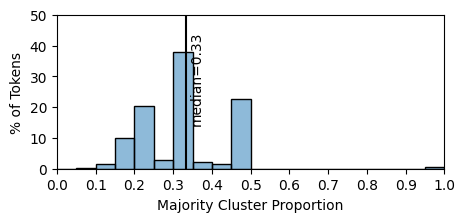

In [13]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(tok2toppct.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Tokens')
ax.set_xlabel('Majority Cluster Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(tok2toppct.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('tok2toppct.pdf', bbox_inches='tight')

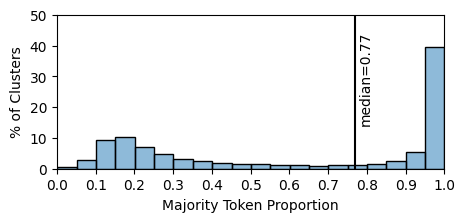

In [14]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.histplot(code2toppct.values(), bins=20, legend=False, ax=ax, stat='percent')
ax.set_ylabel('% of Clusters')
ax.set_xlabel('Majority Token Proportion')
ax.set_xlim(0, 1)
ax.set_xticks([x/10 for x in range(11)])
ax.set_ylim(0, 50)
m = median(code2toppct.values())
ax.axvline(m, c='k')
ax.text(m+0.01, 15, f'median={m:.2f}', rotation='vertical')
plt.savefig('code2toppct.pdf', bbox_inches='tight')

/home/sean/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


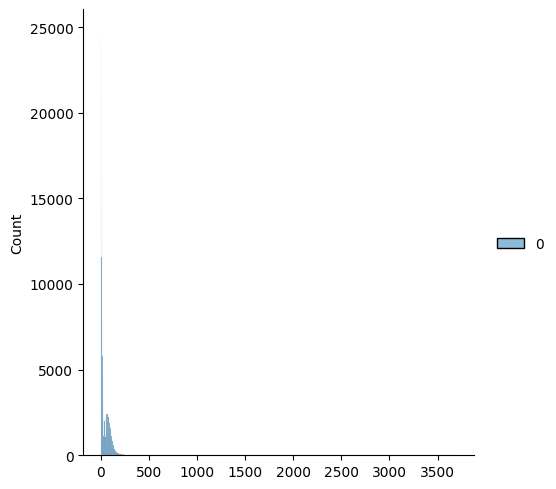

In [12]:
sns.displot(code2count.values())

/home/sean/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


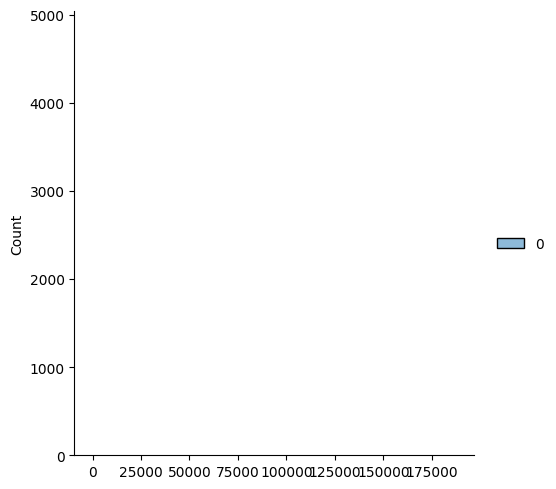

In [13]:
sns.displot(tok2count.values())

In [73]:
inv_vocab = {dir(tokenizer.vocab)

['SPECIAL_TOKENS_ATTRIBUTES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_tokens',
 '_additional_special_tokens',
 '_auto_class',
 '_batch_encode_plus',
 '_bos_token',
 '_call_one',
 '_cls_token',
 '_convert_encoding',
 '_convert_id_to_token',
 '_convert_token_to_id_with_added_voc',
 '_create_repo',
 '_decode',
 '_decode_use_source_tokenizer',
 '_encode_plus',
 '_eos_token',
 '_eventual_warn_about_too_long_sequence',
 '_eventually_correct_t5_max_length',
 '_from_pretrained',
 '_get_files_timestamps',
 '_get_padding_truncation_strategies',
 '_in_target_context_manager',
 '_mask_token',
 '_pad',
 '_p